In [12]:
import pandas as pd

In [13]:
df= pd.read_excel("C:/Users/Florencia Cires/Downloads/Total_bancos.xlsx")
df.head()

,Año,Existencias,Adelantos,Prestamos al Gobierno Nacional,Total depositos
0,1927-01-01,604.90,867.2,362.4,3427.7
1,1927-02-01,544.82,881.3,371.2,3409.5
2,1927-03-01,584.15,867.8,371.8,3441.1
3,1927-04-01,576.74,852.4,370.5,3430.7
4,1927-05-01,595.34,859.7,369.6,3440.5


In [8]:
df.columns

Index(['Año', 'Existencias ', 'Adelantos', 'Prestamos al Gobierno Nacional',
       'Total depositos'],
      dtype='object')

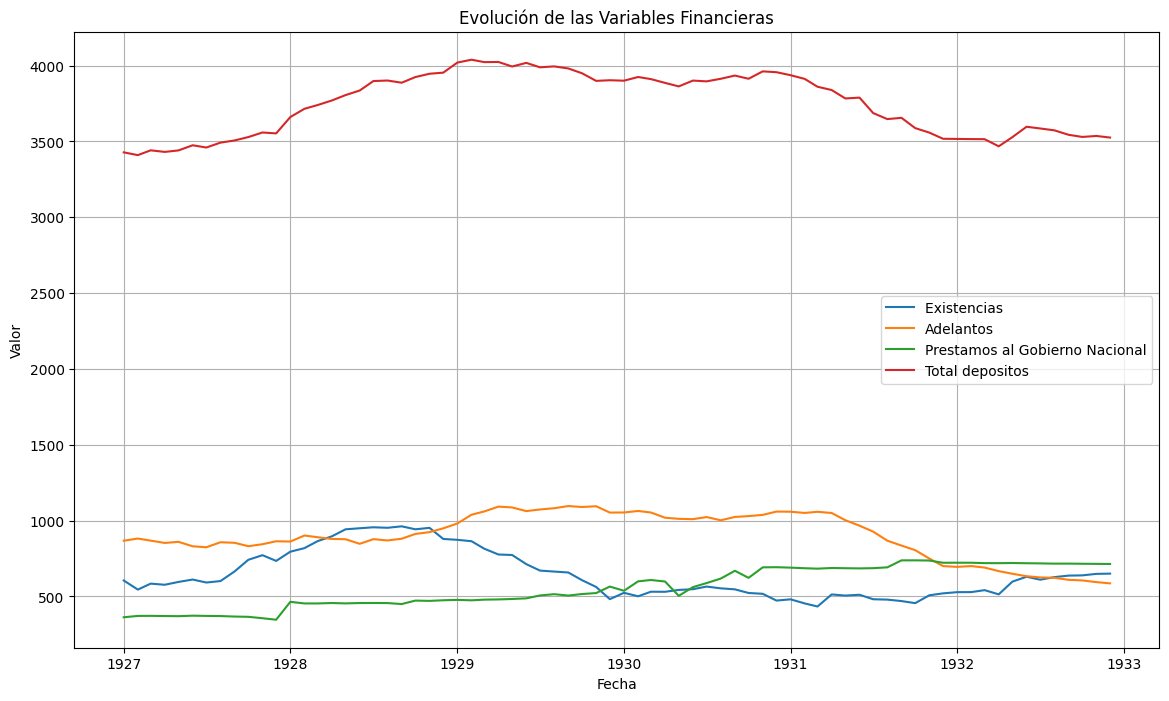

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que la columna 'Año' sea de tipo datetime
df['Año'] = pd.to_datetime(df['Año'], errors='coerce')

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar cada columna (excepto 'Año') en el mismo gráfico
for column in df.columns[1:]:  # Excluyendo la columna 'Año'
    plt.plot(df['Año'], df[column], label=column)

# Personalizar el gráfico
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Evolución de las Variables Financieras")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


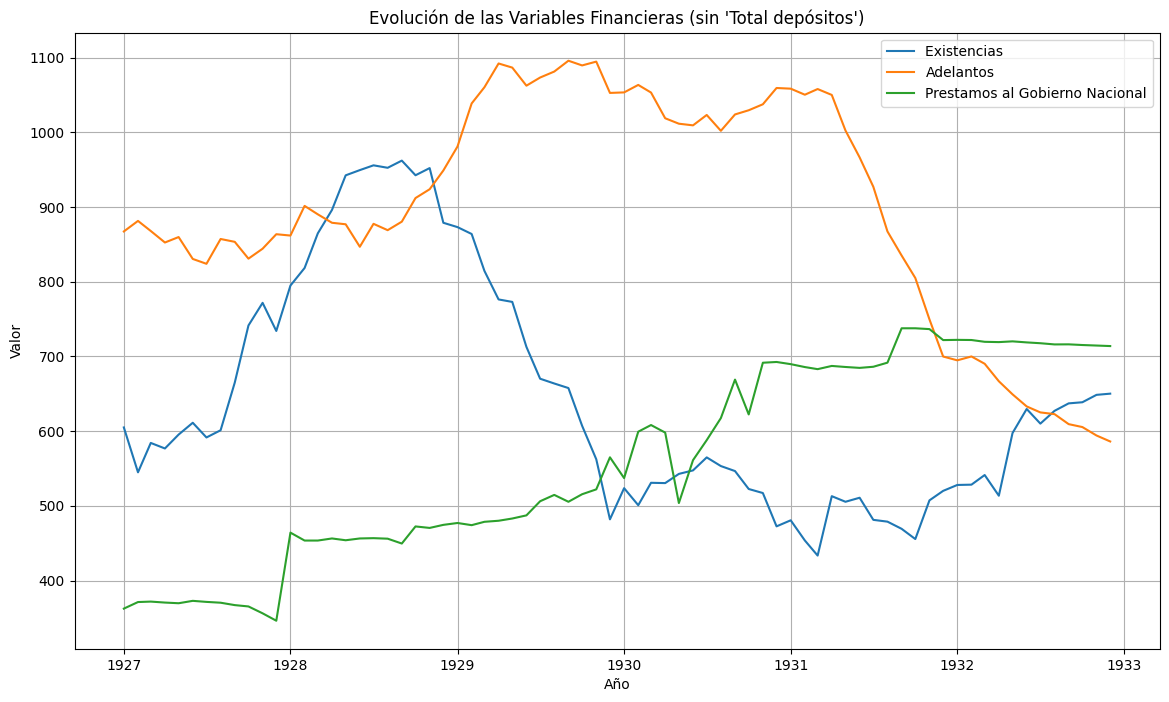

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que la columna 'Año' sea de tipo datetime
df['Año'] = pd.to_datetime(df['Año'], errors='coerce')

# Eliminar la columna 'Total depósitos' del DataFrame para que no se incluya en el gráfico


# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar cada columna excepto 'Año' en el mismo gráfico
for column in df.columns[1:]:  # Excluyendo la columna 'Año'
    plt.plot(df['Año'], df[column], label=column)

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Valor")
plt.title("Evolución de las Variables Financieras (sin 'Total depósitos')")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()



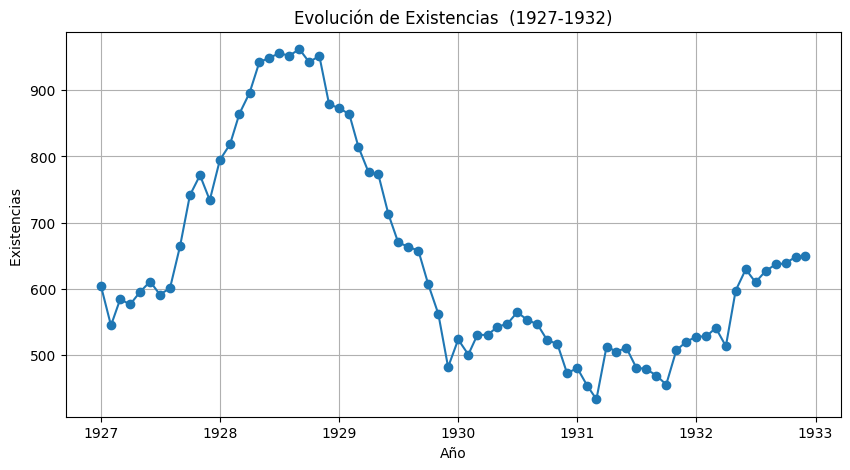

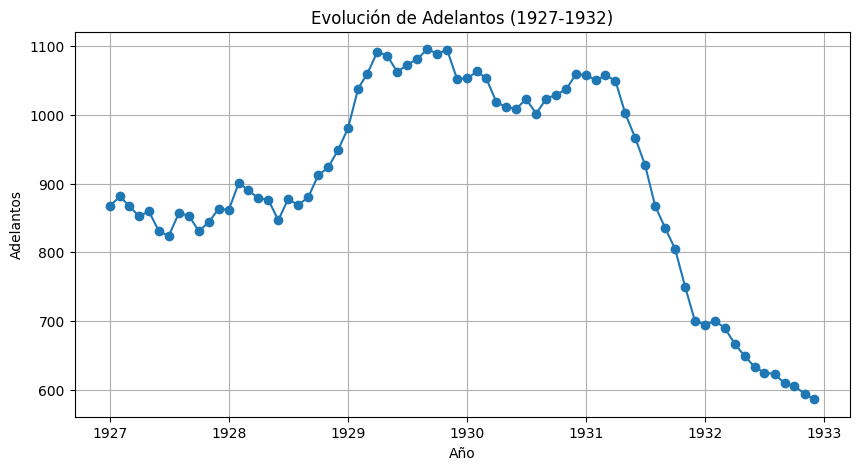

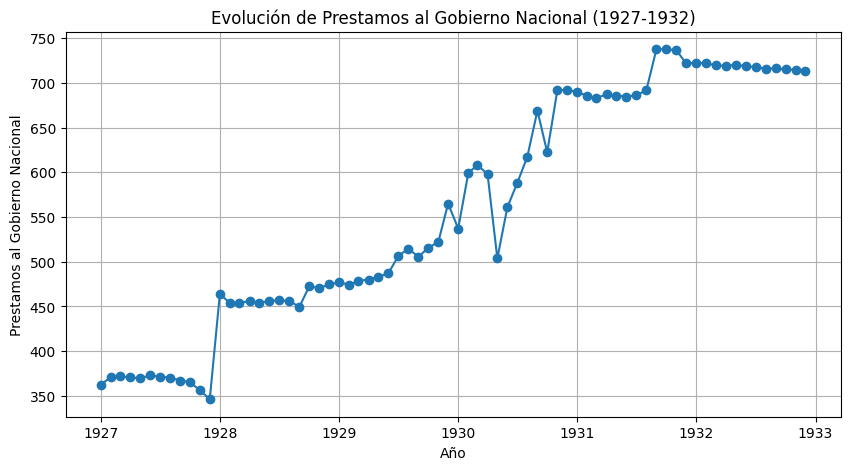

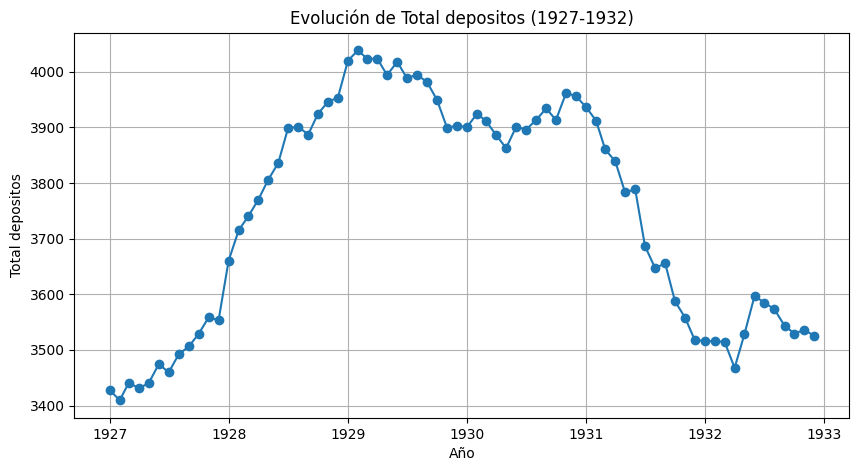

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# PARA GRAFICAR LAS SERIES DE CADA VARIABLE
for column in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Año'], df[column], marker='o')
    plt.title(f'Evolución de {column} (1927-1932)')
    plt.xlabel('Año')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Guardar en una carpeta específica (ejemplo de la carpeta Descargas en Windows)
plt.savefig('C:/Users/Florencia Cires/Downloads')

# Mostrar el gráfico (opcional, si también deseas visualizarlo en pantalla)
plt.show()

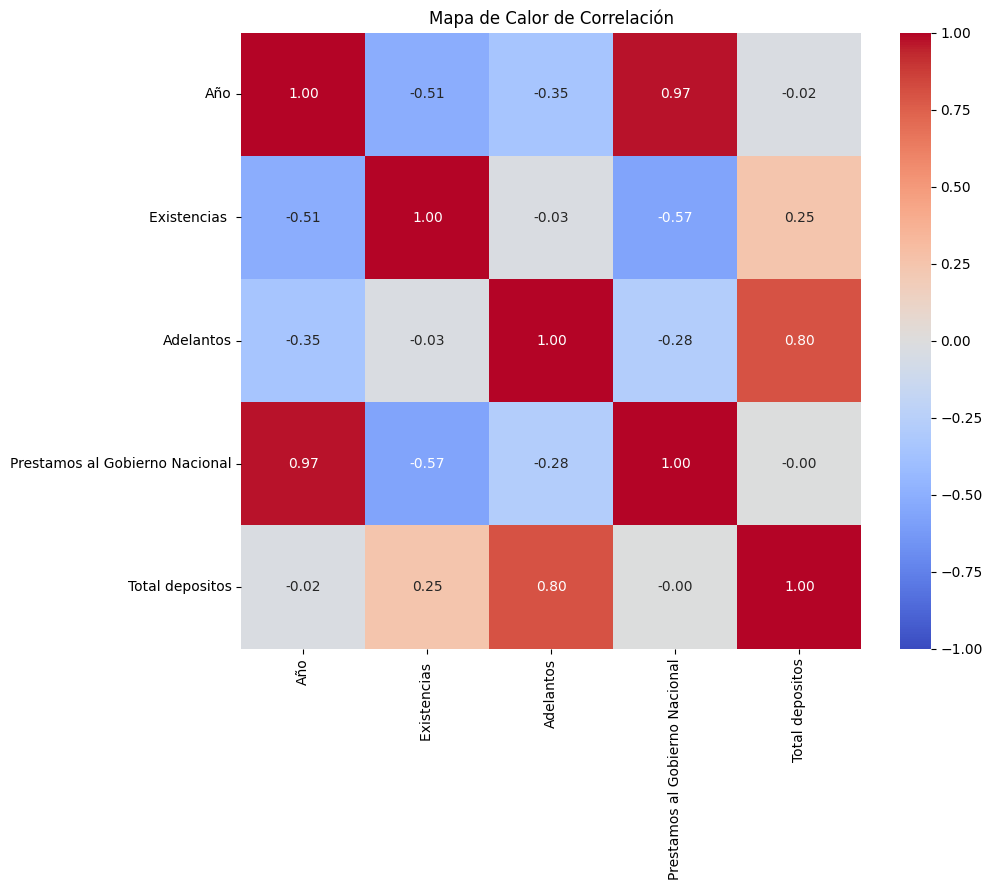

In [15]:
import seaborn as sns
import numpy as np


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variables independientes y dependiente
X = df[['Existencias ', 'Adelantos', 'Prestamos al Gobierno Nacional']]
y = df['Total depositos']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 1801.3143448160588
Coeficiente de determinación (R²): 0.9493752625980009


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir la nueva variable R_D como el cociente entre 'Existencias' y 'Total depósitos'
df['R_D'] = df['Existencias '] / df['Total depositos']

# Definir la variable dependiente (y) y las variables independientes (X)
y = df['R_D']
X = df[['Existencias ', 'Adelantos', 'Prestamos al Gobierno Nacional']]  # Usa las variables disponibles en el DataFrame

# Añadir constante para la regresión (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

# Calcular VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)



                            OLS Regression Results                            
Dep. Variable:                    R_D   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6359.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           3.45e-83
Time:                        20:06:32   Log-Likelihood:                 335.14
No. Observations:                  72   AIC:                            -662.3
Df Residuals:                      68   BIC:                            -653.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       